In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# SMOTE stands for “Synthetic Minority Oversampling Technique” and is 
# one of the most commonly utilized resampling techniques. At a high level, 
# to oversample, pick a sample from the minority class (call it S), and 
# then pick one of its neighbors, N. Then pick a random point on the line segment 
# between S and N. This random new point is the synthetic sample you 
# have created using SMOTE. Repeating this over and over you can create more 
# and more new samples to even out your class imbalance.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [46]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [47]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [48]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31681    0
31682    0
31683    0
31684    0
31685    0
Name: suc_class, Length: 31686, dtype: int64

In [49]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [50]:
x_data.shape

(31686, 346)

In [51]:
#label encode the developer name

In [52]:
x_data['developer']=x_data['developer'].astype('category')

In [53]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,Valve,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#label encode the publisher name

In [55]:
x_data['publisher']=x_data['publisher'].astype('category')

In [57]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [44]:
# over sample the minor class via SMOTE so that the 2
# data sets are balanced

from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_sample(x_data, y_class)

In [45]:
# see classes are balanced
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:, 0].value_counts()

1    30883
0    30883
Name: suc_class, dtype: int64

In [27]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=5)

In [28]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [31]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [32]:
# Instantiate and Train model
y = y_train
X = X_train

clf_1 = LogisticRegression(max_iter=1000).fit(X_train, y_train)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test, y_test)}")

Training Data Score: 0.879112339176237
Testing Data Score: 0.8750809480637223


In [34]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7700
           1       0.90      0.84      0.87      7742

    accuracy                           0.88     15442
   macro avg       0.88      0.88      0.87     15442
weighted avg       0.88      0.88      0.87     15442



In [35]:
# thinking about baseline results:
# Support is balanced - ~9700 of 1's and 0's
# Percision: for no success: 89%, better for successful games: 94%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 94% for 0, 88% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 91% due to overfitting on failure cases

<AxesSubplot:>

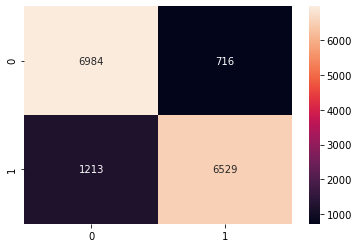

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [37]:
# As you can see, by utilizing SMOTE we have ensured that the classifier produces 
# relatively balanced classifications, as opposed to an unsuccessful model, in which 
# the classifier might classify all samples as belonging to the majority class.

In [38]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
53,tagsoccer,0.024864
324,tagwordgame,0.024294
148,tagepisodic,0.021599
84,tagbasketball,0.020324
219,tagremake,0.019487
342,tagclicker,0.019099
134,tagclassbased,0.017332
261,tagilluminati,0.015583
247,tagmartialarts,0.015369
274,tagrunner,0.014543


In [39]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test)
prob_y_2

array([[7.39857065e-11, 1.00000000e+00],
       [3.99964451e-01, 6.00035549e-01],
       [2.60143823e-02, 9.73985618e-01],
       ...,
       [2.09896886e-03, 9.97901031e-01],
       [9.99406225e-01, 5.93775099e-04],
       [7.97740373e-01, 2.02259627e-01]])

In [40]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [41]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.9300442182462333


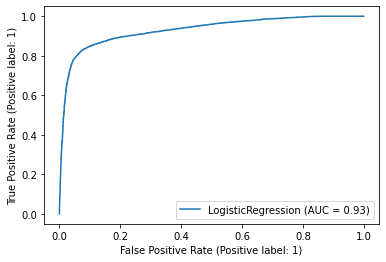

In [42]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_1, X_test, y_test)  
plt.show()